# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


tips = sns.load_dataset("tips")
# calculando a taxa de gorjeta
tips['tip_pct'] = tips['tip'] / tips['total_bill']

tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head() 

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


##### 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex + smoker + diner + net_bill

In [137]:

import patsy as patsy 
import statsmodels.api as sm

# coloquei todas as variáveis para ver o que é significativo pois apenas as especificadas não são suficientes, apenas net_bill acaba sendo significativa o que não geraria um modelo de regressão multivariada.
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + size + day + time', tips)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     17.28
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.74e-20
Time:                        16:43:55   Log-Likelihood:                -368.51
No. Observations:                 244   AIC:                             755.0
Df Residuals:                     235   BIC:                             786.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8089      0.277      2.

##### 2. Remova as variáveis não significantes.

In [138]:

y, X = patsy.dmatrices('tip ~ net_bill + size', tips)    
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Thu, 09 May 2024   Prob (F-statistic):           8.15e-25
Time:                        16:43:55   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.0

##### 3. observe o gráfico de resíduos em função de net_bill

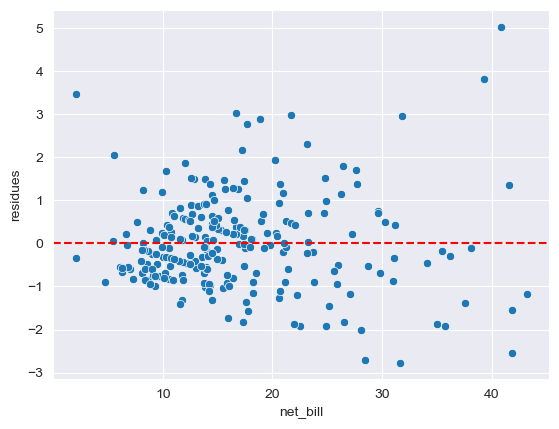

In [139]:

tips['residues'] = modelo.resid
sns.scatterplot(x = 'net_bill', y = 'residues', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

##### 4. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [140]:

y, X = patsy.dmatrices('tip ~ np.log(net_bill) + size', tips)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Thu, 09 May 2024   Prob (F-statistic):           9.66e-23
Time:                        16:43:55   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0708      0.418  

In [141]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill, 2) + size', tips)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     66.10
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.30e-23
Time:                        16:43:55   Log-Likelihood:                -371.60
No. Observations:                 244   AIC:                             749.2
Df Residuals:                     241   BIC:                             759.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.43

O melhor modelo é o que tem a variável net_bill sem transformação e a variável size.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

##### 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.

In [142]:
# 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + net_bill + time', tips)
modelo1 = sm.OLS(y, X).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.21e-18
Time:                        16:43:55   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

##### 2. Remova as variáveis não significantes.


In [143]:
# 2. Remova as variáveis não significantes.
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.60e-21
Time:                        16:43:56   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

##### 3. Observe o gráfico de resíduos em função de ```net_bill```


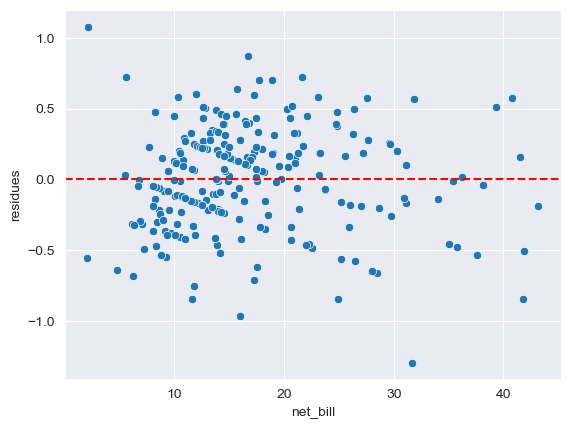

In [144]:
# 3. Observe o gráfico de resíduos em função de net_bill
tips['residues'] = modelo.resid
sns.scatterplot(x = 'net_bill', y = 'residues', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

##### 4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.


In [145]:
# 4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 09 May 2024   Prob (F-statistic):           5.62e-22
Time:                        16:43:56   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

In [146]:
y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2)', tips)
modelo = sm.OLS(y, X).fit() 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 09 May 2024   Prob (F-statistic):           7.70e-17
Time:                        16:43:56   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

##### 5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [147]:
# Calcular o R^2 na escala de tip (sem o log) para o modelo do item 4
predicted_tips_log_net_bill = modelo.predict(X)  # Prever os valores de tip usando o modelo
predicted_tips = np.exp(predicted_tips_log_net_bill)  # Desfazer o log dos valores de tip
residuals = tips['tip'] - predicted_tips  # Calcular os resíduos

# Calcular R^2
SST = np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2)
SSR = np.sum(residuals ** 2)
R2 = 1 - (SSR / SST)

print("R^2 na escala de 'tip' (sem o log) para o modelo do item 4:", R2)

# Agora, vamos comparar com o R^2 do modelo do item 1
print("R^2 do modelo do item 1:", modelo1.rsquared)

R^2 na escala de 'tip' (sem o log) para o modelo do item 4: 0.2444173412730396
R^2 do modelo do item 1: 0.3132389303427352


In [148]:
# O melhor modelo é o que tem a variável net_bill sem transformação. mas o modelo com a variável net_bill em log é melhor que o modelo com a variável net_bill ao quadrado.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [149]:
previsao_de_renda = pd.read_csv('../../../../Datasets/previsao_de_renda.csv', sep = ',')
previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [150]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [151]:
# tratando nan values
previsao_de_renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [152]:
previsao_de_renda.dropna(inplace = True)
previsao_de_renda['tempo_emprego'].isna().sum()

0

C:\Users\Lucia\AppData\Local\Temp\ipykernel_28168\3513369190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes_renda = previsao_de_renda.corr()['renda'].drop('renda')


<Axes: >

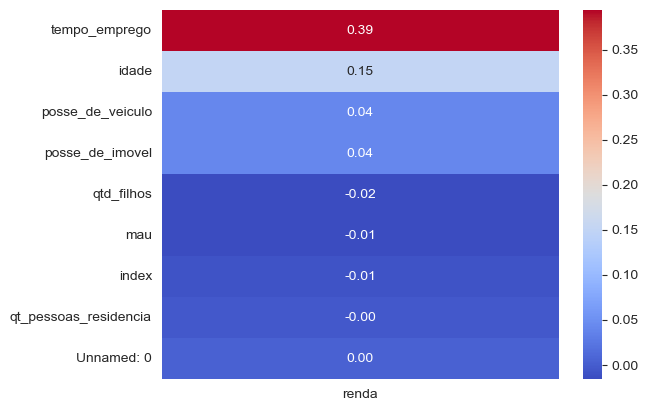

In [153]:

# Calcular as correlações apenas com a variável "renda"
correlacoes_renda = previsao_de_renda.corr()['renda'].drop('renda')

# Ordenar as correlações por valor absoluto em ordem decrescente
correlacoes_renda_sorted = correlacoes_renda.abs().sort_values(ascending=False)

# Selecionar apenas as correlações ordenadas
correlacoes_renda_sorted = correlacoes_renda[correlacoes_renda_sorted.index]

# Criar o heatmap com as correlações ordenadas
sns.heatmap(correlacoes_renda_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")



##### 1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [154]:

y, X = patsy.dmatrices('renda ~ tempo_emprego', previsao_de_renda)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        16:43:57   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

##### 2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?


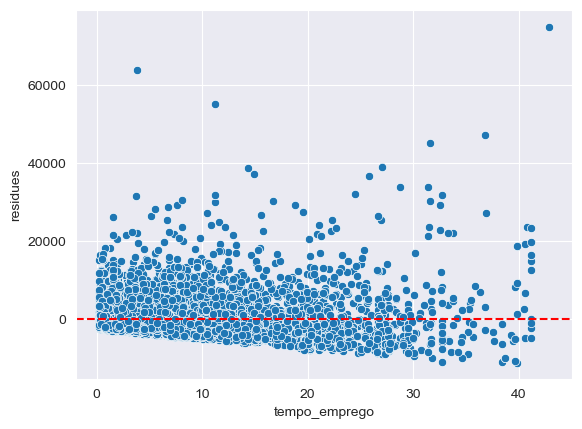

In [155]:

previsao_de_renda['residues'] = modelo.resid
sns.scatterplot(x = 'tempo_emprego', y = 'residues', data = previsao_de_renda)  
plt.axhline(y=0, color='r', linestyle='--')

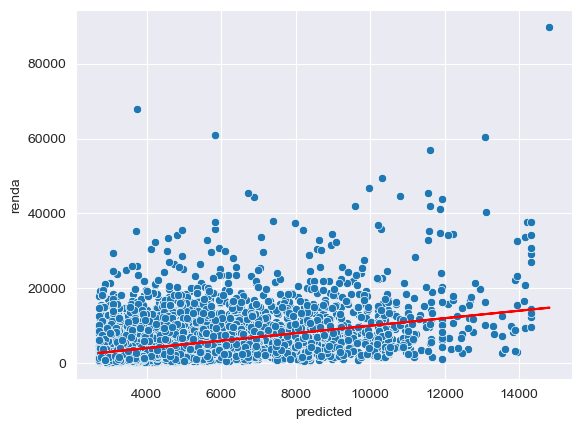

In [156]:
previsao_de_renda['predicted'] = modelo.fittedvalues
sns.scatterplot(x = 'predicted', y = 'renda', data = previsao_de_renda)
plt.plot(previsao_de_renda['predicted'], previsao_de_renda['predicted'], color = 'red')

A regressão não é adequada. Para melhorar a regressão simples, poderíamos tentar transformar a variável tempo_emprego ou utilizar outra variável explicativa.

##### 3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.

In [ ]:


numerical_columns = previsao_de_renda.select_dtypes(include = ['float64', 'int64'])
numerical_columns = numerical_columns.drop(columns = ['index', 'renda', 'residues'])
numerical_columns = numerical_columns.columns.tolist()
# Criando a fórmula para a matriz de design
formula = 'renda ~ ' + ' + '.join(numerical_columns)
y, X = patsy.dmatrices(formula, previsao_de_renda)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

In [ ]:

y, X = patsy.dmatrices('renda ~ tempo_emprego + idade + qt_pessoas_residencia', previsao_de_renda)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

##### 4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [ ]:
import itertools

# Variáveis para as transformações
transformacoes = ['none', 'log', 'power']

# Lista de variáveis independentes
variaveis_independentes = ['tempo_emprego', 'idade', 'qt_pessoas_residencia']

# Gerar todas as combinações possíveis das transformações
combinacoes = list(itertools.product(transformacoes, repeat=len(variaveis_independentes)))

# Lista para armazenar as fórmulas
formulas = []
for i in ['np.log(renda)', 'renda']:
    formula_aux = i + ' ~ '
# Criar as fórmulas para cada combinação
    for combo in combinacoes:
        formula = formula_aux
        for i, var in enumerate(variaveis_independentes):
            if combo[i] == 'log':
                formula += f'np.log({var})'
            elif combo[i] == 'power':
                formula += f'np.power({var}, 2)'
            else:
                formula += var
            if i < len(variaveis_independentes) - 1:
                formula += ' + '
        formulas.append(formula)
for i in formulas:
    print(i)

In [ ]:
# testando várias combinações de transformações logarítmicas e polinomiais

# criando lista de fórmulas para testar várias combinações semelhante a um grid search


best_r2 = 0

for i in formulas:
    y, X = patsy.dmatrices(i, previsao_de_renda)
    modelo = sm.OLS(y, X).fit()
    if modelo.rsquared > best_r2:
        best_r2 = modelo.rsquared
        best_formula = i
    # imprimindo apenas o R2
    print(f'R2: {modelo.rsquared}')    
    print(f'Formula: {i}')

print(f'Melhor R2: {best_r2}')
print(f'Melhor formula: {best_formula}')

In [72]:
y, X = patsy.dmatrices('np.log(renda) ~ np.power(tempo_emprego, 2) + np.power(idade, 2) + np.log(qt_pessoas_residencia) + sexo + tipo_renda + posse_de_imovel', previsao_de_renda)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     407.6
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        16:20:02   Log-Likelihood:            -1.2193e+05
No. Observations:               12466   AIC:                         2.439e+05
Df Residuals:                   12456   BIC:                         2.440e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

##### 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

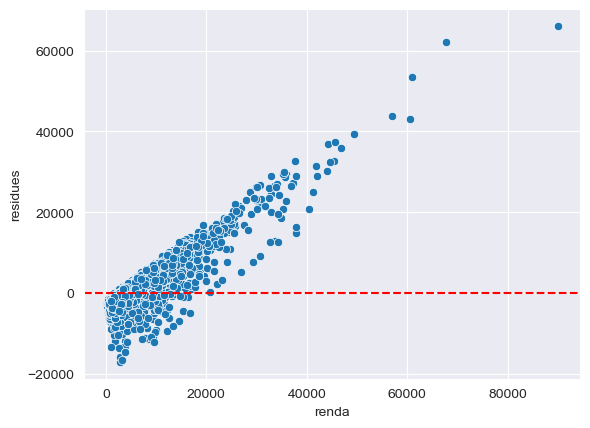

In [73]:
previsao_de_renda['residues'] = modelo.resid
sns.scatterplot(x = 'renda', y = 'residues', data = previsao_de_renda)
plt.axhline(y=0, color='r', linestyle='--')

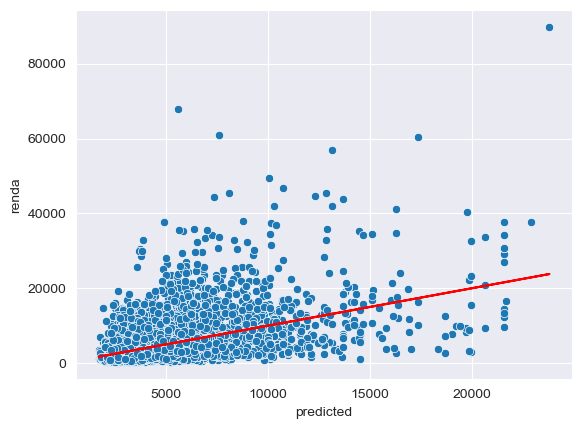

In [74]:
previsao_de_renda['predicted'] = modelo.fittedvalues
sns.scatterplot(x = 'predicted', y = 'renda', data = previsao_de_renda)
plt.plot(previsao_de_renda['predicted'], previsao_de_renda['predicted'], color = 'red')